In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the data
df = pd.read_csv('https://raw.githubusercontent.com/yuzucado/NYCCOVID/main/COVID-19_Daily_Counts_of_Cases__Hospitalizations__and_Deaths.csv')

I'd like to look at NYC COVID-19 data about confirmed case count, death count, hospitalization count, and how they has changed over time. 

In [3]:
#check the info so I can have the column header and dtype in a glance
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 62 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   DATE_OF_INTEREST                795 non-null    object
 1   CASE_COUNT                      795 non-null    int64 
 2   probable_case_count             795 non-null    int64 
 3   HOSPITALIZED_COUNT              795 non-null    int64 
 4   DEATH_COUNT                     795 non-null    int64 
 5   DEATH_COUNT_PROBABLE            795 non-null    int64 
 6   CASE_COUNT_7DAY_AVG             795 non-null    int64 
 7   all_case_count_7day_avg         795 non-null    int64 
 8   HOSP_COUNT_7DAY_AVG             795 non-null    int64 
 9   DEATH_COUNT_7DAY_AVG            795 non-null    int64 
 10  all_death_count_7day_avg        795 non-null    int64 
 11  BX_CASE_COUNT                   795 non-null    int64 
 12  bx_probable_case_count          795 non-null    in

In [4]:
#making sure the data are shown properly
df.tail()

,DATE_OF_INTEREST,CASE_COUNT,probable_case_count,HOSPITALIZED_COUNT,DEATH_COUNT,DEATH_COUNT_PROBABLE,CASE_COUNT_7DAY_AVG,all_case_count_7day_avg,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,...,si_probable_case_count,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,si_probable_death_count,SI_CASE_COUNT_7DAY_AVG,si_all_case_count_7day_avg,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,si_all_death_count_7day_avg,INCOMPLETE
790,4/29/2022,2369,585,57,2,0,2110,2685,60,4,...,39,5,0,0,134,168,4,0,0,60800
791,4/30/2022,1368,516,57,6,0,2122,2710,61,4,...,20,5,2,0,137,170,4,1,1,60800
792,5/1/2022,1556,576,44,3,1,2153,2760,61,4,...,35,1,0,0,129,163,4,0,1,60800
793,5/2/2022,3129,873,28,0,1,2230,2856,57,4,...,58,1,0,0,132,169,3,0,1,60800
794,5/3/2022,2457,928,0,3,1,2214,2885,47,3,...,62,0,0,1,131,171,3,0,0,60800


In [5]:
#changing the data type of columne "DATE_OF_INTEREST" to datetime so I can break it up into year, month, and day in next step
df['DATE_OF_INTEREST'] = pd.to_datetime(df['DATE_OF_INTEREST'], format='%m/%d/%Y')

In [6]:
#creating year, month, day columns from column DATE_OF_INTEREST 
df['YEAR']= df['DATE_OF_INTEREST'].dt.year
df['MONTH']= df['DATE_OF_INTEREST'].dt.month
df['DAY']= df['DATE_OF_INTEREST'].dt.day

In [7]:
#to check the YEAR, MONTH, DAY columns are created
df

,DATE_OF_INTEREST,CASE_COUNT,probable_case_count,HOSPITALIZED_COUNT,DEATH_COUNT,DEATH_COUNT_PROBABLE,CASE_COUNT_7DAY_AVG,all_case_count_7day_avg,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,...,si_probable_death_count,SI_CASE_COUNT_7DAY_AVG,si_all_case_count_7day_avg,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,si_all_death_count_7day_avg,INCOMPLETE,YEAR,MONTH,DAY
0,2020-02-29,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2020,2,29
1,2020-03-01,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2020,3,1
2,2020-03-02,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2020,3,2
3,2020-03-03,1,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2020,3,3
4,2020-03-04,5,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2020,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,2022-04-29,2369,585,57,2,0,2110,2685,60,4,...,0,134,168,4,0,0,60800,2022,4,29
791,2022-04-30,1368,516,57,6,0,2122,2710,61,4,...,0,137,170,4,1,1,60800,2022,4,30
792,2022-05-01,1556,576,44,3,1,2153,2760,61,4,...,0,129,163,4,0,1,60800,2022,5,1
793,2022-05-02,3129,873,28,0,1,2230,2856,57,4,...,0,132,169,3,0,1,60800,2022,5,2


In [8]:
#The file includes data since 2/29/2020, the day when NYC has the first lab-confirmed COVID case, to 5/3/2022. Since it only has 3 days of May 2022 data, I'm going to drop the last 3 rows for a cleaner data.
df.drop([792,793,794])

,DATE_OF_INTEREST,CASE_COUNT,probable_case_count,HOSPITALIZED_COUNT,DEATH_COUNT,DEATH_COUNT_PROBABLE,CASE_COUNT_7DAY_AVG,all_case_count_7day_avg,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,...,si_probable_death_count,SI_CASE_COUNT_7DAY_AVG,si_all_case_count_7day_avg,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,si_all_death_count_7day_avg,INCOMPLETE,YEAR,MONTH,DAY
0,2020-02-29,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2020,2,29
1,2020-03-01,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2020,3,1
2,2020-03-02,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2020,3,2
3,2020-03-03,1,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2020,3,3
4,2020-03-04,5,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2020,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,2022-04-26,2568,618,71,7,1,1916,2420,59,4,...,1,136,168,6,0,0,0,2022,4,26
788,2022-04-27,2381,612,74,5,0,1960,2491,63,4,...,0,136,168,6,0,0,60800,2022,4,27
789,2022-04-28,2241,601,66,4,1,2015,2570,64,4,...,0,136,169,5,0,0,60800,2022,4,28
790,2022-04-29,2369,585,57,2,0,2110,2685,60,4,...,0,134,168,4,0,0,60800,2022,4,29


In [9]:
#drop all the 'probable' columns
drop_cols = ['probable_case_count',
             'DEATH_COUNT_PROBABLE',
             'bx_probable_case_count',
             'bx_probable_death_count',
             'bk_probable_case_count',
             'bk_probable_death_count',
             'mn_probable_case_count',
             'mn_probable_death_count',
             'qn_probable_case_count',
             'qn_probable_death_count',
             'si_probable_case_count',
             'si_probable_death_count',
             'INCOMPLETE']
df.drop(drop_cols, inplace = True, axis=1)

In [10]:
#NYC confirmed case total
df.CASE_COUNT.sum()

2033081

In [11]:
#creating a new dataframe with columns related to different boroughs confirmed case count
boro_case_count = df[['DATE_OF_INTEREST', 'BX_CASE_COUNT', 'BK_CASE_COUNT','MN_CASE_COUNT','QN_CASE_COUNT','SI_CASE_COUNT']]

In [12]:
#checking I have the needed columns
boro_case_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE_OF_INTEREST  795 non-null    datetime64[ns]
 1   BX_CASE_COUNT     795 non-null    int64         
 2   BK_CASE_COUNT     795 non-null    int64         
 3   MN_CASE_COUNT     795 non-null    int64         
 4   QN_CASE_COUNT     795 non-null    int64         
 5   SI_CASE_COUNT     795 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 37.3 KB


In [13]:
#renaming the column names
boro_case_count1 = boro_case_count.rename(columns={'DATE_OF_INTEREST':'Date Tested','BX_CASE_COUNT':'Bronx','BK_CASE_COUNT':'Brooklyn','MN_CASE_COUNT':'Manhattan','QN_CASE_COUNT':'Queens','SI_CASE_COUNT':'Staten_Island'})

In [14]:
#checking the sum of each boroughs and also checking I renamed the columns correctly
boro_case_count1.sum()

Bronx            345136
Brooklyn         617343
Manhattan        360754
Queens           562038
Staten_Island    147287
dtype: int64

Text(0, 0.5, 'Confirmed Case Count')

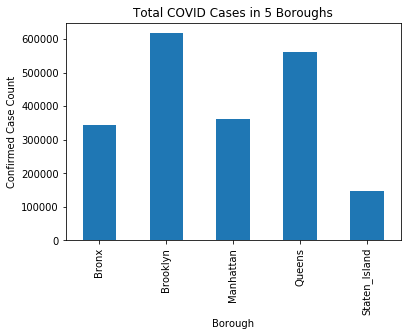

In [15]:
#Create a bar plot to show the sum of each borough confirmed cases
boro_case_count1.sum().plot(kind='bar')

#Add title and axis names
plt.title('Total COVID Cases in 5 Boroughs')
plt.xlabel('Borough')
plt.ylabel('Confirmed Case Count')

Text(0, 0.5, '')

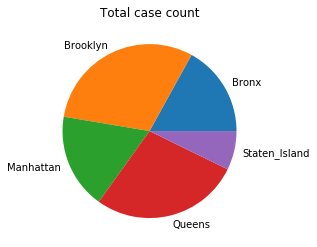

In [16]:
#Create a pie chart to show the Boroughs confirmed case count
boro_case_count1.sum().plot(kind='pie' , title="Total case count")
#remove the y axis label that says "none"
plt.ylabel('')

From the charts above we can clearly see Brooklyn has the highest confirmed cases among 5 boroughs, and is followed by Queens, Manhattan, Bronx. Staten Island has the lowest confirmed cases.

In [17]:
#Show the highest number of confirmed cases in a day of each year
df.groupby(['YEAR'])['CASE_COUNT'].max()

YEAR
2020     6353
2021    51172
2022    54834
Name: CASE_COUNT, dtype: int64

In [18]:
#Show the top 3 dates from each year with the highest confirmed cases.
df_confirmedcase = df[['DATE_OF_INTEREST','CASE_COUNT','YEAR']]
df_confirmedcase.sort_values(['CASE_COUNT','DATE_OF_INTEREST'],ascending=False).groupby('YEAR').head(3)

,DATE_OF_INTEREST,CASE_COUNT,YEAR
674,2022-01-03,54834,2022
667,2021-12-27,51172,2021
669,2021-12-29,50373,2021
668,2021-12-28,49407,2021
675,2022-01-04,49035,2022
676,2022-01-05,40127,2022
37,2020-04-06,6353,2020
30,2020-03-30,6129,2020
38,2020-04-07,6044,2020


The date with the highest confirmed case in 2022 was 1/3/2022.<br>
The date with the highest confirmed case in 2021 was 12/27/2021.<br>
The date with the highest confirmed case in 2020 was 4/6/2020.


In [19]:
#Show the top date from each year with the highest 7 days average confirmed case count
df_7dayavg = df[['DATE_OF_INTEREST','CASE_COUNT_7DAY_AVG','YEAR']]
df_7dayavg.sort_values(['CASE_COUNT_7DAY_AVG','DATE_OF_INTEREST'],ascending=False).groupby('YEAR').head(1)

,DATE_OF_INTEREST,CASE_COUNT_7DAY_AVG,YEAR
674,2022-01-03,39309,2022
671,2021-12-31,36828,2021
39,2020-04-08,5291,2020


In [20]:
#the average count of "7 days average case count".
df_7dayavg.mean()

CASE_COUNT_7DAY_AVG    2548.754717
YEAR                   2020.768553
dtype: float64

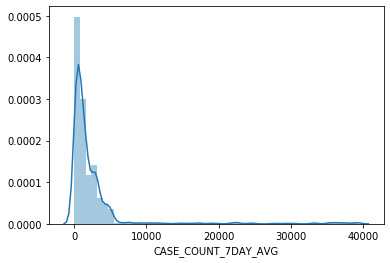

In [21]:
#distplot with 7 days average
sns.distplot(df['CASE_COUNT_7DAY_AVG'])

In [22]:
#setting the columns that I will want to use as x and y axis in the plot I'm going to create in next step
x_date = df['DATE_OF_INTEREST']
y_case = df['CASE_COUNT']

Text(0, 0.5, 'Confirmed Case Count')

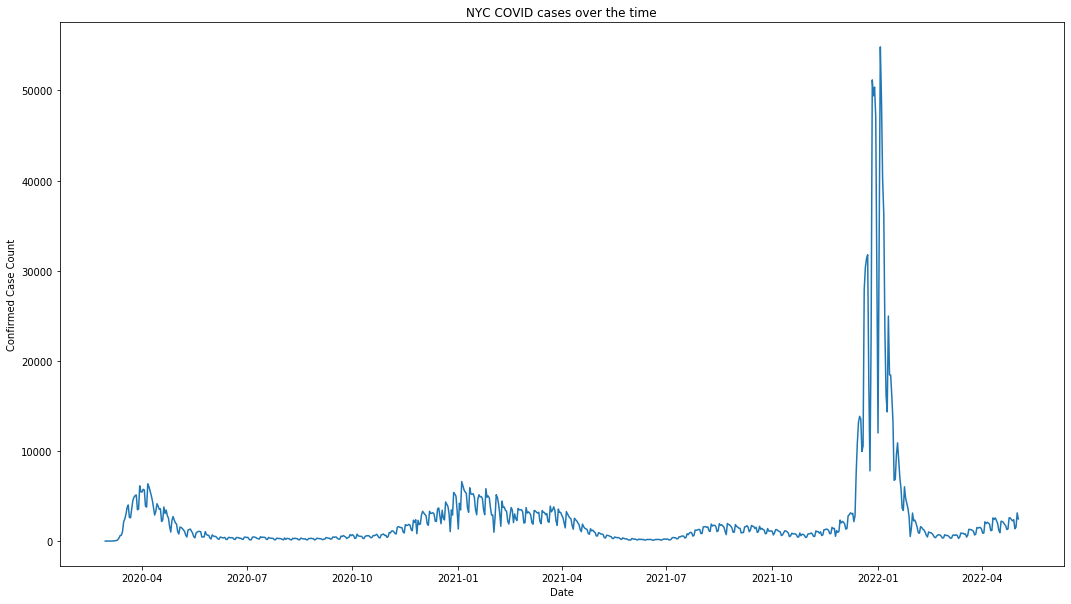

In [23]:
#create a figure and one subplot
fig, ax = plt.subplots(figsize=(18, 10))
ax.plot(x_date, y_case)

#Add title and axis names
plt.title('NYC COVID cases over the time')
plt.xlabel('Date')
plt.ylabel('Confirmed Case Count')

Cases increased in 4/2020, 1/2021, and reached the peak in 1/2022. In 2/2022, the confirmed case count slowed down and decreased to less than one tenth of its peak count. At the end of 4/2022, cases start to increase again.

In [24]:
#Show the top date from each year with the highest hospitalized.
df_hospitalized = df[['DATE_OF_INTEREST','HOSPITALIZED_COUNT','YEAR']]
df_hospitalized.sort_values(['HOSPITALIZED_COUNT','DATE_OF_INTEREST'],ascending=False).groupby('YEAR').head(1)

,DATE_OF_INTEREST,HOSPITALIZED_COUNT,YEAR
30,2020-03-30,1850,2020
673,2022-01-02,1316,2022
670,2021-12-30,1055,2021


In [25]:
#setting the columns that I will want to use as x and y axis in the plot I'm going to create in next step
y_hosp = df['HOSPITALIZED_COUNT']
y_death = df['DEATH_COUNT']

Text(0, 0.5, 'Hospitalized Count')

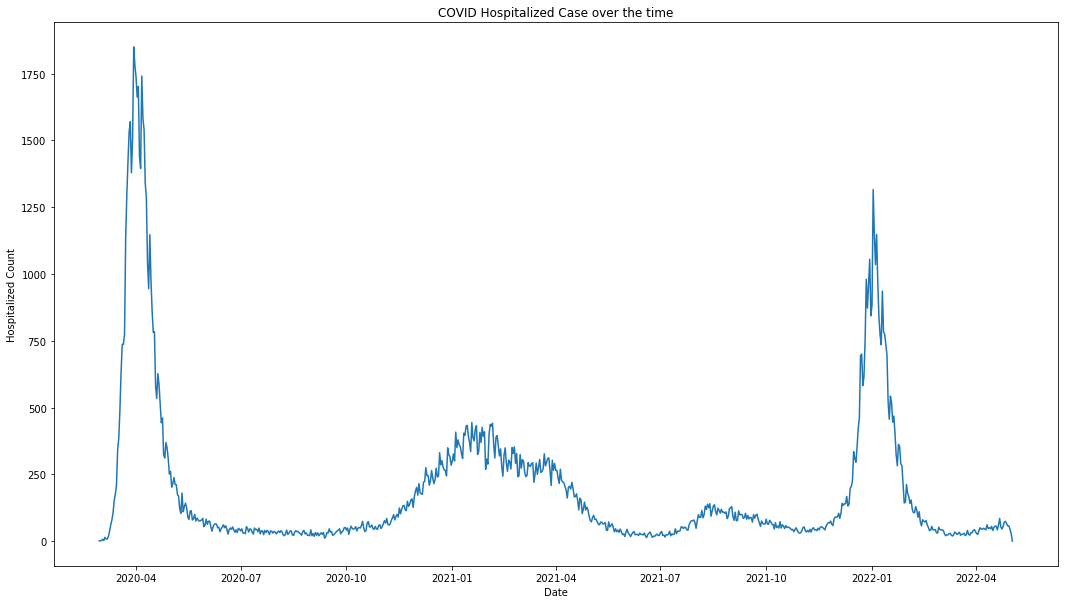

In [26]:
#create a figure and one subplot for hospitalization
fig, ax2 = plt.subplots(figsize=(18, 10))
ax2.plot(x_date, y_hosp)

#Add title and axis names
plt.title('COVID Hospitalized Case over the time')
plt.xlabel('Date')
plt.ylabel('Hospitalized Count')

Even though in Jan 2022, COVID confirmed cases reached 40k a day, but hospitalization rate was relatively low comparing to the confirmed case count, the highest was around 1250. Back in April 2020, when COVID just hit NYC, there were more than 1750 cases on the highest count day.

In [27]:
#Show the top date from each year with the highest death.
df_death = df[['DATE_OF_INTEREST','DEATH_COUNT','YEAR']]
df_death.sort_values(['DEATH_COUNT','DATE_OF_INTEREST'],ascending=False).groupby('YEAR').head(1)

,DATE_OF_INTEREST,DEATH_COUNT,YEAR
38,2020-04-07,598,2020
682,2022-01-11,131,2022
348,2021-02-11,96,2021


Text(0, 0.5, 'Death Count')

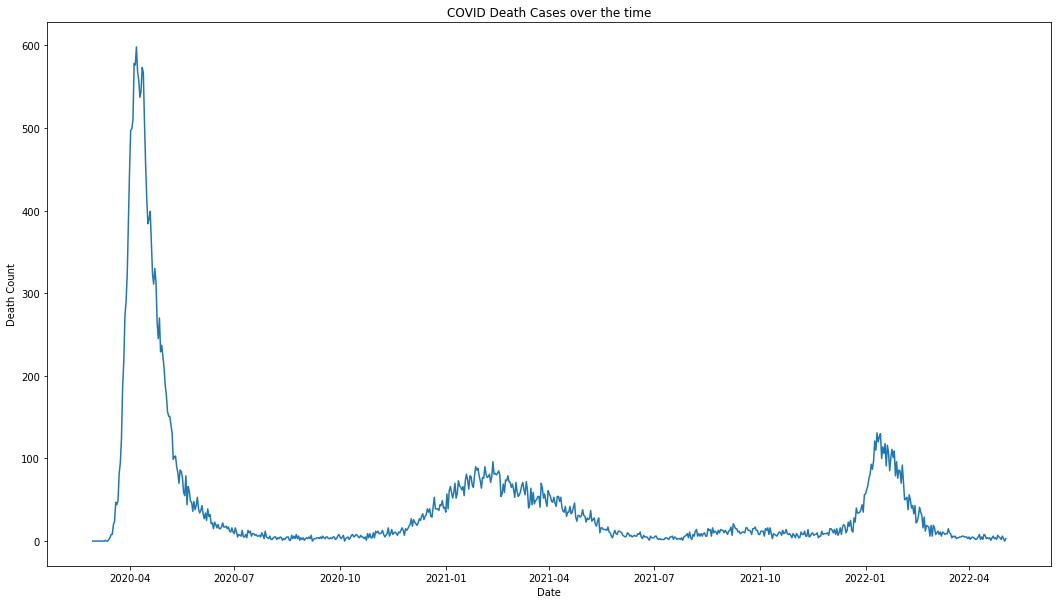

In [28]:
#create a figure and one subplot for death count
fig, ax3 = plt.subplots(figsize=(18, 10))
ax3.plot(x_date, y_death)

#Add title and axis names
plt.title('COVID Death Cases over the time')
plt.xlabel('Date')
plt.ylabel('Death Count')

In above plot, it showed April 2020 had the highest death count in a day. It looks similar to the previous Hospitalization plot. It was because comparing the what first hit NYC, COVID has mutant to different variant, which was much more contagious but much less deadly.

Even though COVID is still in NYC among us, it is so much different from what it was at the beginning of the pandemic. <br><br>At the beginning, people who didn't think COVID was a serious virus said it was just a flu. It wasn't "just a flu" back then and our city wasn't prepared, but now it has mutated to kind of like a flu and we're far more experienced. New Yorkers are living with this virus. People who still stay at home all the time like it was 2020 should reevaluate the situation learn to live with COVID being around, as we don't know when or if it will be completely gone one day.